In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [26]:
import sys
import os
sys.path.append("/path/to/STARmap/python/")
from analysis import *
from viz import *

In [6]:
base_path = "/path/to/combinatorially_encoded/visual_160/20170915_BD2_dark"
S = STARmapAnalysis()
S.add_data(load_data(base_path),group=0)

In [7]:
S.filter_cells_by_expression(min_genes=3)
S.filter_cells_by_feature("reads_per_cell", 100, 2000)


837


In [8]:
# normalize expression per cell by median
S.normalize(norm_type="median")

# use linear regression to scale data and remove technical covariates
S.scale(model_type="linear", do_trim=False)


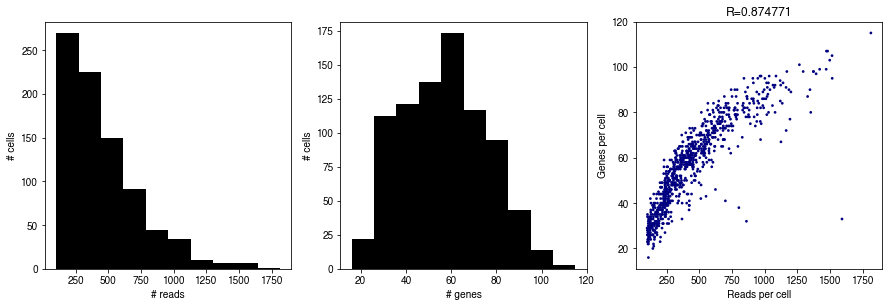

In [9]:
# show stats per cell
plt.figure(figsize=(15,10))
S.plot_stats_per_cell()


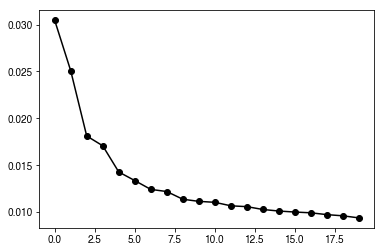

In [18]:
# perform PCA
S.pca(n_components=20)
plt.figure()

# plot PCA explained variance
S.plot_explained_variance()


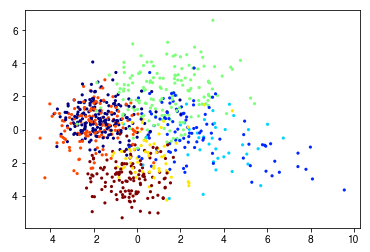

In [19]:
# plot PCA clusters
S.plot_pca()

In [12]:
# cluste rdata
max_pc = 8
k = 20
S.cluster_snn(k=k, max_pc=max_pc)


In [15]:
# compute UMAP visualization
S.umap(max_pc=max_pc,n_neighbors=k,min_dist=0.05)


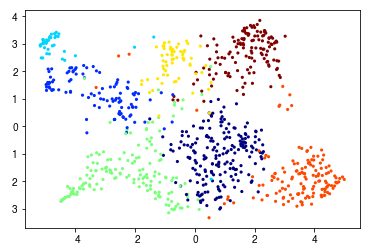

In [17]:
# plot tSNE/UMAP (with cluster labels)
S.plot_tsne()


/home/dlab/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


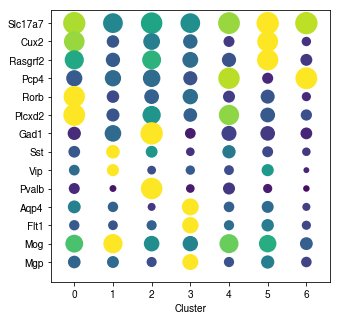

In [21]:
# plot the expression of a few genes per cluster
gene_names = ["Slc17a7", "Cux2", "Rasgrf2", "Pcp4","Rorb", "Plcxd2",   "Gad1", "Sst", "Vip", "Pvalb","Aqp4","Flt1", "Mog","Mgp"]
plt.figure(figsize=(5,5))
d = S.dotplot_expression_across_clusters(gene_names,scale_max=500)


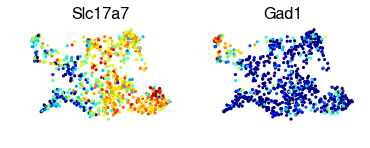

In [22]:
# plot the expression of a few genes overlaid on low-D visualization
S.plot_tsne_gene_expression(['Slc17a7','Gad1'])

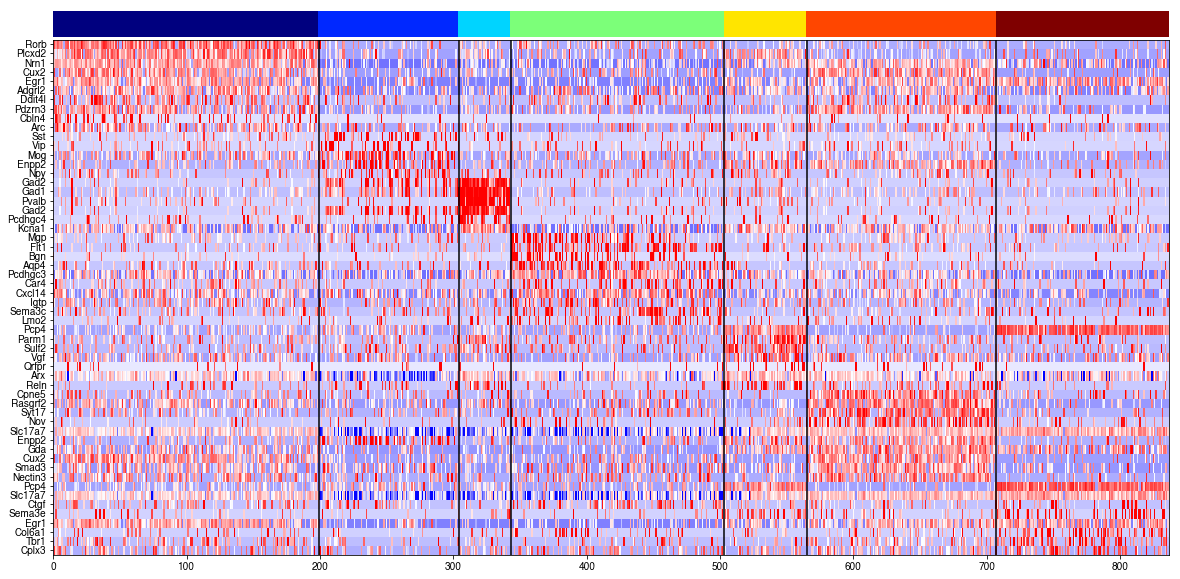

In [27]:
# find marker genes and plot heatmap
markers = S.find_all_markers(test="bimod", only_pos=True, log_fc_thresh=0.1,min_pct=0.1, fdr_correct=True)
markers = list(top_genes_per_clust(markers,N=10,pval_thresh=1e-6,))
plt.figure(figsize=(20,10))
plot_heatmap_with_labels(S, markers,plt.cm.jet,show_axis=True, font_size=10)
